In [2]:
import warnings

warnings.filterwarnings('ignore')

Starting K-Means clustering script...
Generating dataset...
Dataset saved as kmeans_dataset.csv
Scaling dataset...
Scaler saved as scaler.pkl
Finding optimal number of clusters...
Optimal number of clusters found: 4
Optimal number of clusters: 4


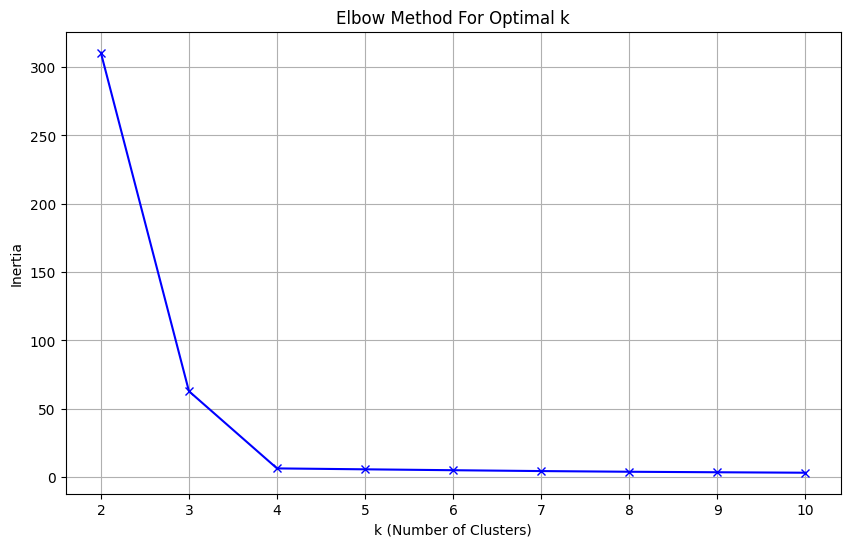

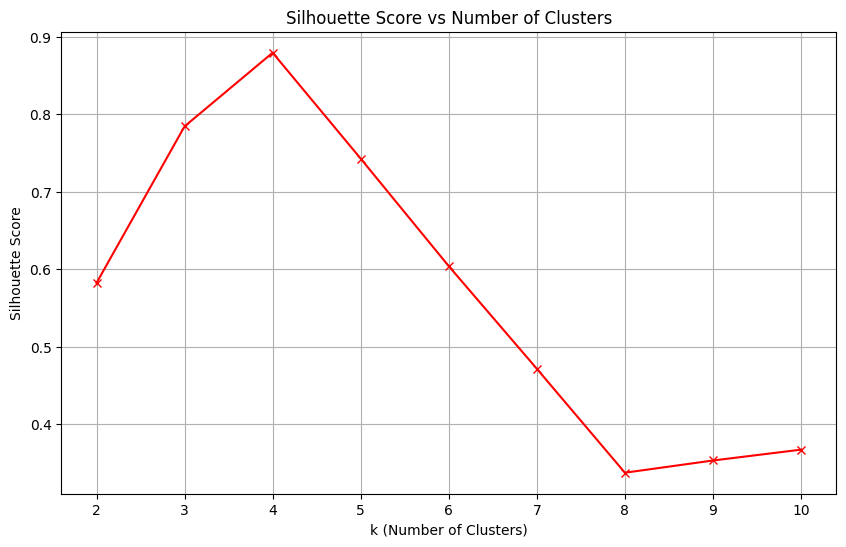

Training K-Means model with 4 clusters...
Model saved as kmeans_model.pkl


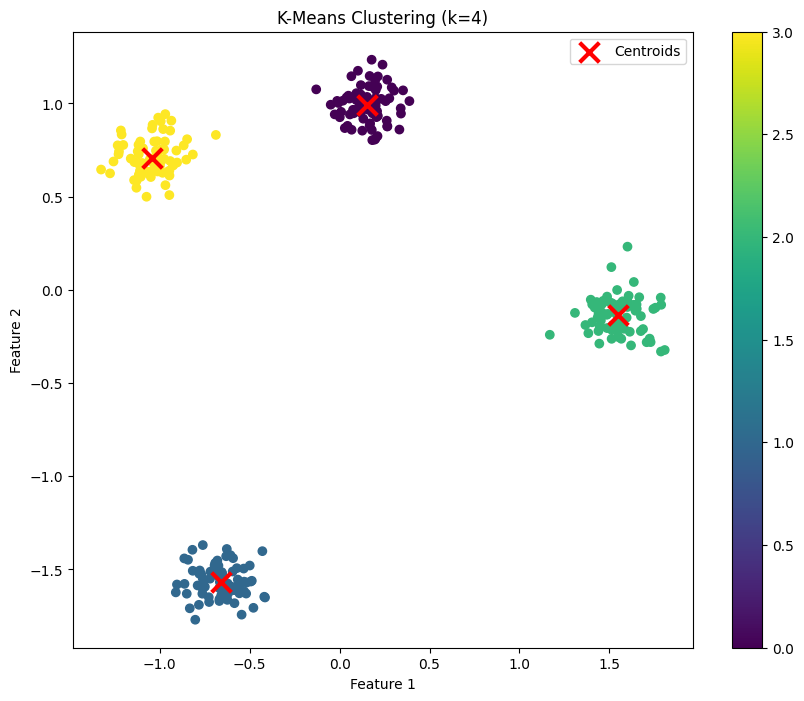


Sample point belongs to cluster: 3
Script execution completed.


In [3]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
import logging
import os
import joblib
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Setup logging
log_file = "kmeans_logs.txt"
logging.basicConfig(filename=log_file, level=logging.INFO,
                    format="%(asctime)s - %(levelname)s - %(message)s",
                    filemode="w")

def log_message(message):
    """Log and print messages"""
    print(message)
    logging.info(message)

def generate_data(n_samples=300, n_centers=4):
    """Generate sample data for clustering and save it"""
    log_message("Generating dataset...")
    
    X, y = make_blobs(
        n_samples=n_samples,
        centers=n_centers,
        cluster_std=0.60,
        random_state=42
    )

    # Save dataset
    dataset_filename = "kmeans_dataset.csv"
    df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
    df.to_csv(dataset_filename, index=False)
    
    log_message(f"Dataset saved as {dataset_filename}")
    return X

def preprocess_data(X):
    """Scale features using StandardScaler"""
    log_message("Scaling dataset...")
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Save scaler
    joblib.dump(scaler, "scaler.pkl")
    log_message("Scaler saved as scaler.pkl")
    
    return X_scaled, scaler

def find_optimal_clusters(X, max_k=10):
    """Find optimal number of clusters using silhouette score"""
    log_message("Finding optimal number of clusters...")
    
    silhouette_scores = []
    inertias = []
    K = range(2, max_k+1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
        inertias.append(kmeans.inertia_)
    
    optimal_k = K[np.argmax(silhouette_scores)]
    log_message(f"Optimal number of clusters found: {optimal_k}")
    
    return optimal_k, silhouette_scores, inertias, K

def plot_elbow_curve(K, inertias):
    """Plot the elbow curve"""
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k (Number of Clusters)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.grid(True)
    plt.show()

def plot_silhouette_scores(K, scores):
    """Plot silhouette scores"""
    plt.figure(figsize=(10, 6))
    plt.plot(K, scores, 'rx-')
    plt.xlabel('k (Number of Clusters)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.grid(True)
    plt.show()

def plot_clusters(X, kmeans, title="K-Means Clustering"):
    """Plot the clusters and centroids"""
    plt.figure(figsize=(10, 8))
    
    # Plot points
    scatter = plt.scatter(X[:, 0], X[:, 1], 
                         c=kmeans.labels_,
                         cmap='viridis')
    
    # Plot centroids
    plt.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                c='red', marker='x', s=200, 
                linewidth=3, label='Centroids')
    
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.colorbar(scatter)
    plt.show()

def train_kmeans(X, n_clusters):
    """Train K-Means clustering model and save it"""
    log_message(f"Training K-Means model with {n_clusters} clusters...")
    
    kmeans = KMeans(
        n_clusters=n_clusters,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X)
    
    # Save model
    model_filename = "kmeans_model.pkl"
    joblib.dump(kmeans, model_filename)
    log_message(f"Model saved as {model_filename}")
    
    return kmeans

def main():
    log_message("Starting K-Means clustering script...")

    # Generate data
    X = generate_data()
    
    # Preprocess data
    X_scaled, scaler = preprocess_data(X)
    
    # Find optimal number of clusters
    optimal_k, silhouette_scores, inertias, K = find_optimal_clusters(X_scaled)
    log_message(f"Optimal number of clusters: {optimal_k}")
    
    # Plot evaluation metrics
    plot_elbow_curve(K, inertias)
    plot_silhouette_scores(K, silhouette_scores)
    
    # Train model with optimal k
    kmeans = train_kmeans(X_scaled, optimal_k)
    
    # Plot results
    plot_clusters(X_scaled, kmeans, f"K-Means Clustering (k={optimal_k})")
    
    # Example prediction
    sample = X_scaled[0].reshape(1, -1)
    cluster = kmeans.predict(sample)
    log_message(f"\nSample point belongs to cluster: {cluster[0]}")

    log_message("Script execution completed.")

if __name__ == "__main__":
    main()
